In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [7]:
import scipy

In [2]:
df = pd.read_csv("/content/Life Expectancy Data.csv")

In [3]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Normality tests

Assumption: Observations are identically distributed

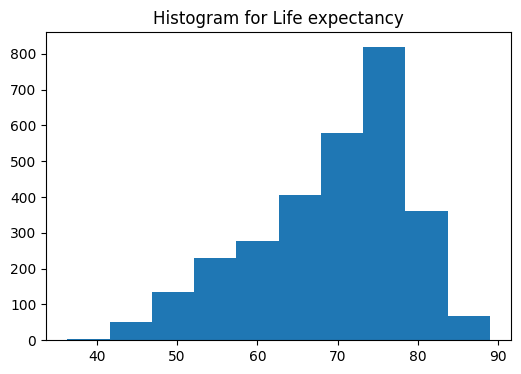

In [5]:
# Using Matplotlib to create a count plot
plt.figure(figsize=(6, 4))
plt.hist(df['Life expectancy '])
plt.title('Histogram for Life expectancy')
plt.show()

### Shapiro-Wilk Test

In [13]:
from scipy.stats import shapiro

life_exp = df["Life expectancy "].dropna()

stat, p = shapiro(life_exp)

print('stat=%.2f, p=%.30f' % (stat,p))

if p > 0.05:
  print('Normal distribution')
else:
  print('Not a normal distribution')

stat=0.96, p=0.000000000000000000000000000074
Not a normal distribution


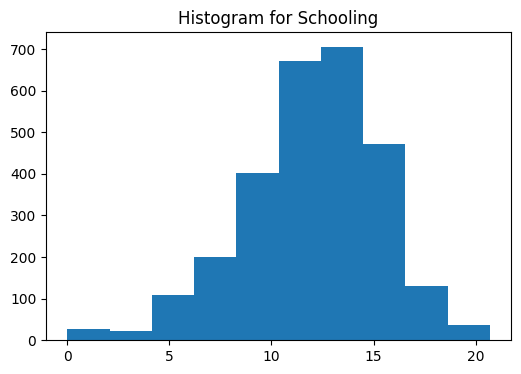

In [14]:
plt.figure(figsize=(6, 4))
plt.hist(df['Schooling'])
plt.title('Histogram for Schooling')
plt.show()

In [15]:
#Shapiro Wilk test for Schooling column
schooling = df['Schooling'].dropna()

stat, p = shapiro(schooling)

print('stat=%.2f, p=%.30f' % (stat,p))

if p > 0.05:
  print('Normal distribution')
else:
  print('Not a normal distribution')

stat=0.98, p=0.000000000000000000030803516023
Not a normal distribution


### D'Agostino's K-squared test

In [16]:
from scipy.stats import normaltest

life_exp = df["Life expectancy "].dropna()

stat, p = normaltest(life_exp)

print('stat=%.2f, p=%.30f' % (stat,p))

if p > 0.05:
  print('Normal distribution')
else:
  print('Not a normal distribution')

stat=177.36, p=0.000000000000000000000000000000
Not a normal distribution


### Correlation Test- Pearsons and Spearmans Rank Correlation

Assumption: Identical and normal distribution

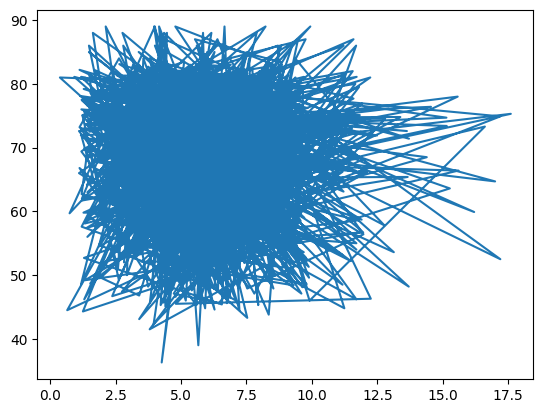

In [25]:
feature1 = df["Total expenditure"].dropna().sample(2000, random_state=1)
feature2 = df["Life expectancy "].dropna().sample(2000, random_state=1)


plt.plot(feature1,feature2)
plt.show()

In [26]:
from scipy.stats import pearsonr

stat, p = pearsonr(feature1,feature2)

print('stat=%.3f, p=%5f' % (stat,p))

if p > 0.05:
  print('independent samples')
else:
  print('dependent samples')

stat=-0.041, p=0.065212
independent samples


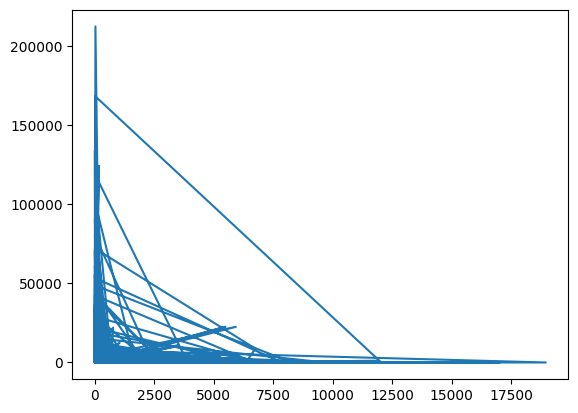

In [33]:
feature3 = df["percentage expenditure"].dropna().sample(2000, random_state=1)
feature4 = df["Measles "].dropna().sample(2000, random_state=1)


plt.plot(feature3,feature4)
plt.show()

In [34]:
stat, p = pearsonr(feature3,feature4)

print('stat=%.3f, p=%5f' % (stat,p))

if p > 0.05:
  print('independent samples')
else:
  print('dependent samples')

stat=-0.058, p=0.009987
dependent samples


In [36]:
from scipy.stats import spearmanr

stat, p = spearmanr(feature3,feature4)

print('stat=%.3f, p=%5f' % (stat,p))

if p > 0.05:
  print('independent samples')
else:
  print('dependent samples')

stat=-0.175, p=0.000000
dependent samples


### For Categorical Variables- Chi squared test

In [38]:
#To check whether two variables are related or not
contingency_data = pd.crosstab(df['Country'],df['Status'])

In [39]:
contingency_data

Status,Developed,Developing
Country,,
Afghanistan,0,16
Albania,0,16
Algeria,0,16
Angola,0,16
Antigua and Barbuda,0,16
...,...,...
Venezuela (Bolivarian Republic of),0,16
Viet Nam,0,16
Yemen,0,16


Value in each should be greater than 25 or else the test is not very reliable

In [40]:
contigency_data2 = pd.crosstab(df['Country'],df['Year'])
contigency_data2

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Afghanistan,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Albania,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Algeria,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Angola,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Antigua and Barbuda,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Viet Nam,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Yemen,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [43]:
contigency_data3 = pd.crosstab(df['Year'],df['Status'])
contigency_data3

Status,Developed,Developing
Year,,
2000,32,151
2001,32,151
2002,32,151
2003,32,151
2004,32,151
2005,32,151
2006,32,151
2007,32,151
2008,32,151


In [44]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contingency_data)

print('stat=%.3f, p=%.3f' % (stat,p))

if p > 0.05:
  print('independent categories')
else:
  print('dependent categories')

stat=2938.000, p=0.000
dependent categories
